In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [5]:
df = pd.read_csv('../data/Mall_Customers.csv')

print("First 5 rows of the dataset:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

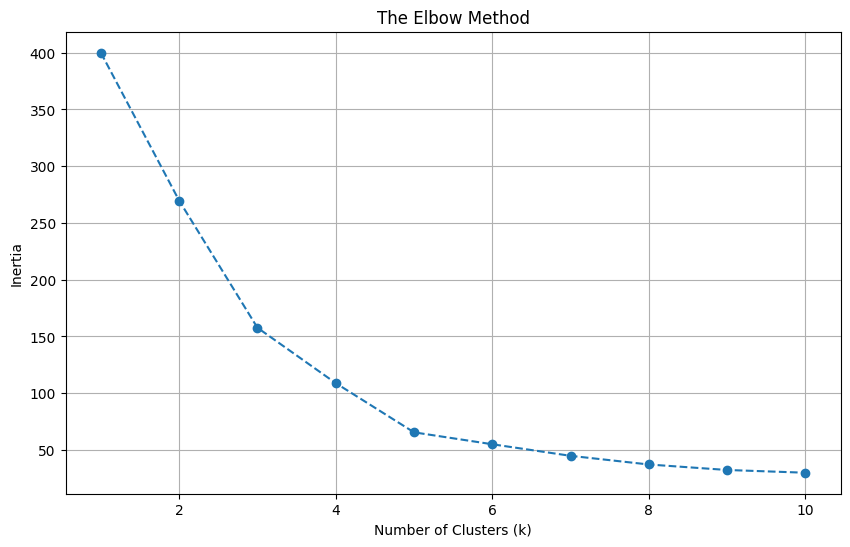

In [7]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    # Initialize KMeans with a specific number of clusters (k)
    # The random_state ensures reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    # Append the inertia (sum of squared distances to the nearest cluster center)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the inertia for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [8]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model and predict the cluster labels for each data point
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the number of customers in each cluster
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())


Number of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


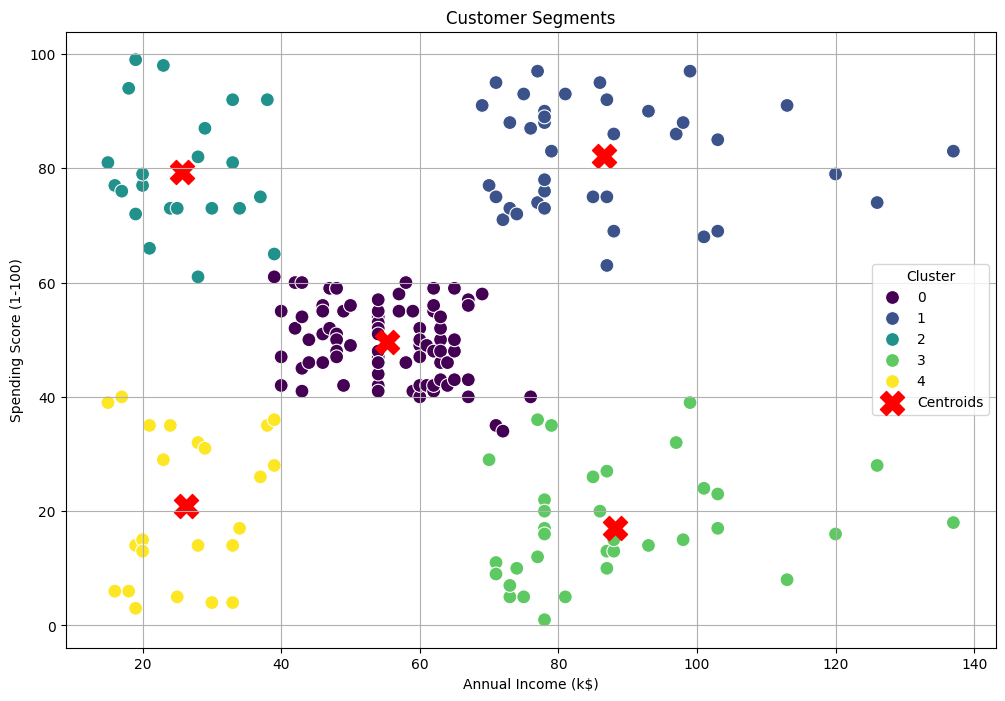

In [9]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Create the scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, legend='full')

# Plot the cluster centers (centroids) on the same graph
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
